In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("./messy_large_dataset.csv")

In [30]:
df.head(10)

,id,name,age,signup_date,email,purchase_amount,membership_level,phone
0,1,Grace,102.0,2021-06-10,grace@mail.com,0.0,silver,123‑4567
1,2,David,63.0,2021/01/05,david@mail.com,120.5,Gold,NaN
2,3,Hannah,56.0,2021/01/05,hannah@example,-50.0,silver,4567890
3,4,Eve,59.0,2020/12/31,eve@example,300.0,Silver,2345678
4,5,Grace,28.0,2021-06-10,grace at example dot com,NaN,Silver,5678901
5,6,Jack,60.0,2021-06-10,jack@example.com,200.0,NaN,5678901
6,7,Charlie,52.0,2021/01/05,charlie at example dot com,-50.0,gold,345‑6789
7,8,Grace,64.0,2021/03/15,grace@mail.com,120.5,Silver,4567890
8,9,Hannah,20.0,NaN,hannah@example,-50.0,silver,345‑6789
9,10,Eve,21.0,NaN,eve@example,-50.0,gold,NaN


In [31]:
df.loc[df["email"].str.contains("at"),"email"]=df.loc[df["email"].str.contains("at"),"email"].str.replace(" at ","@").str.replace(" dot ",".")
df.loc[~df["email"].str.contains("com"),"email"]=df.loc[~df["email"].str.contains("com"),"email"]+".com"
df['name'] = df['name'].str.strip()
df["membership_level"]=df["membership_level"].str.capitalize()
df["email"]=df["email"].str.lower()
df=df.drop_duplicates(subset=["name","age","signup_date","phone","membership_level"]).reset_index(drop=True)
df["id"]=df.index+1
from dateutil import parser

def parse_mixed_dates(x):
    try:
        return parser.parse(x, dayfirst=False, yearfirst=True)
    except:
        try:
            return parser.parse(x, dayfirst=True, yearfirst=False)
        except:
            return pd.NaT

df['signup_date'] = df['signup_date'].astype(str).apply(parse_mixed_dates)
df['purchase_amount'] = df['purchase_amount'].abs()
median_purchase = df['purchase_amount'].median()
df['purchase_amount'].fillna(median_purchase, inplace=True)
mode_membership = df['membership_level'].mode()[0] 
df['membership_level'].fillna(mode_membership, inplace=True)
df['phone'] = df['phone'].str.replace(r'\D', '', regex=True)
df.loc[df["phone"].str.len()==7,"phone"]=df.loc[df["phone"].str.len()==7,"phone"].str.slice(0,3)+"-"+df.loc[df["phone"].str.len()==7,"phone"].str.slice(3)
df["phone"]=df["phone"].fillna("Unknown")
df.loc[df["age"]>100,"age"]=np.nan
df.head(10)


C:\Users\aryan\AppData\Local\Temp\ipykernel_35072\3478444895.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['purchase_amount'].fillna(median_purchase, inplace=True)
C:\Users\aryan\AppData\Local\Temp\ipykernel_35072\3478444895.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

,id,name,age,signup_date,email,purchase_amount,membership_level,phone
0,1,Grace,NaN,2021-06-10,grace@mail.com,0.0,Silver,123-4567
1,2,David,63.0,2021-01-05,david@mail.com,120.5,Gold,Unknown
2,3,Hannah,56.0,2021-01-05,hannah@example.com,50.0,Silver,456-7890
3,4,Eve,59.0,2020-12-31,eve@example.com,300.0,Silver,234-5678
4,5,Grace,28.0,2021-06-10,grace@example.com,120.5,Silver,567-8901
5,6,Jack,60.0,2021-06-10,jack@example.com,200.0,Silver,567-8901
6,7,Charlie,52.0,2021-01-05,charlie@example.com,50.0,Gold,345-6789
7,8,Grace,64.0,2021-03-15,grace@mail.com,120.5,Silver,456-7890
8,9,Hannah,20.0,NaT,hannah@example.com,50.0,Silver,345-6789
9,10,Eve,21.0,NaT,eve@example.com,50.0,Gold,Unknown


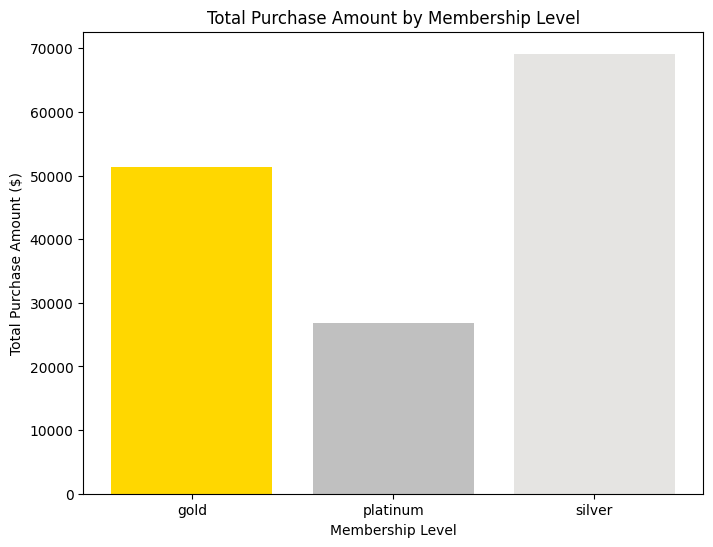

In [32]:


# Clean 'membership_level'
df['membership_level'] = df['membership_level'].str.lower()
df['membership_level'] = df['membership_level'].fillna(df['membership_level'].mode()[0])

# Clean 'purchase_amount'
df['purchase_amount'] = df['purchase_amount'].abs() # Correct negative values
df['purchase_amount'] = df['purchase_amount'].fillna(df['purchase_amount'].median())


# 2. Group the data and calculate the sum
# This is the key step: group by level, then sum the purchases for each group
purchase_by_level = df.groupby('membership_level')['purchase_amount'].sum()


# 3. Create the bar graph
plt.figure(figsize=(8, 6))
plt.bar(purchase_by_level.index, purchase_by_level.values, color=['gold', 'silver', '#E5E4E2'])


# 4. Customize the plot with new labels
plt.title('Total Purchase Amount by Membership Level')
plt.xlabel('Membership Level')
plt.ylabel('Total Purchase Amount ($)') # Changed the Y-axis label


# 5. Save and show the plot
plt.savefig('membership_purchases_barchart.png')
plt.show()